<a href="https://colab.research.google.com/github/LuisDavid999/UDEA-ai4eng-20251-Pruebas-Saber-Pro-Colombia/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [ ]:
!chmod 600 ./kaggle.json

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
dataset = pd.read_csv("train.csv")

In [ ]:
dataset.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
print(dataset.shape)

(692500, 21)


Missing values in columns

In [ ]:
k = dataset.isna().sum()
k[k!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_TIENEINTERNET.1,26629


# Discover data types

In [ ]:
dataset.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [ ]:
for column in dataset.columns:
    print(column, dataset[column].dtype)

ID int64
PERIODO int64
ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
FAMI_TIENEINTERNET object
FAMI_EDUCACIONPADRE object
FAMI_TIENELAVADORA object
FAMI_TIENEAUTOMOVIL object
ESTU_PRIVADO_LIBERTAD object
ESTU_PAGOMATRICULAPROPIO object
FAMI_TIENECOMPUTADOR object
FAMI_TIENEINTERNET.1 object
FAMI_EDUCACIONMADRE object
RENDIMIENTO_GLOBAL object
coef_1 float64
coef_2 float64
coef_3 float64
coef_4 float64


# Histogram of the 10 academic programs with the most students

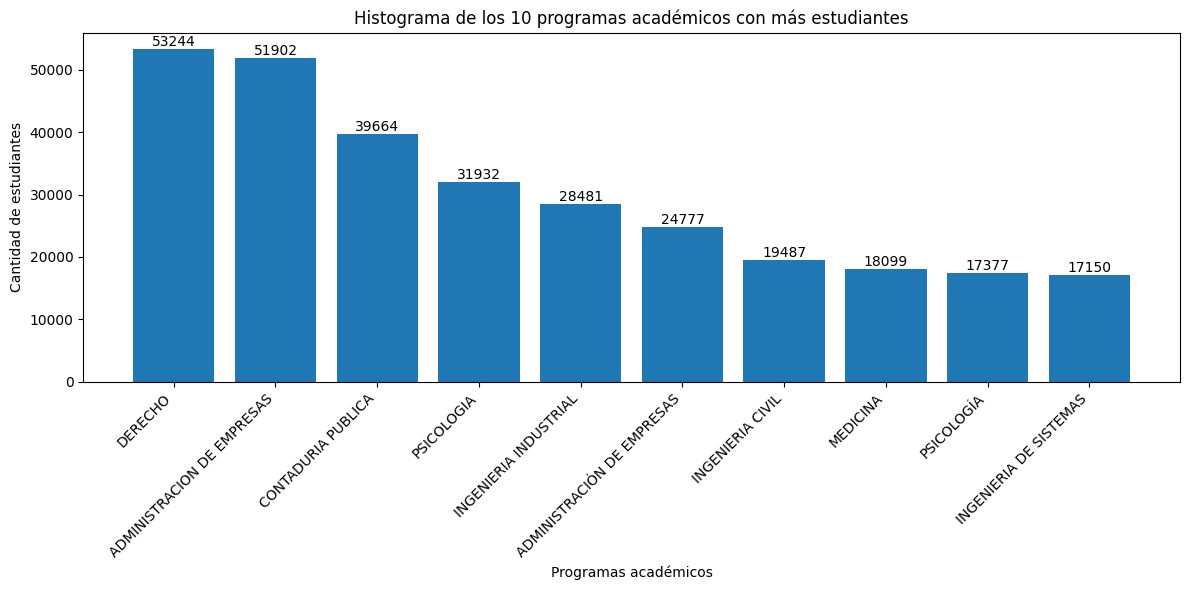

In [ ]:
top_10_programs = dataset['ESTU_PRGM_ACADEMICO'].value_counts().nlargest(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_programs.index, top_10_programs.values)

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel("Programas académicos")
plt.ylabel("Cantidad de estudiantes")
plt.title("Histograma de los 10 programas académicos con más estudiantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Histogram of students in each department

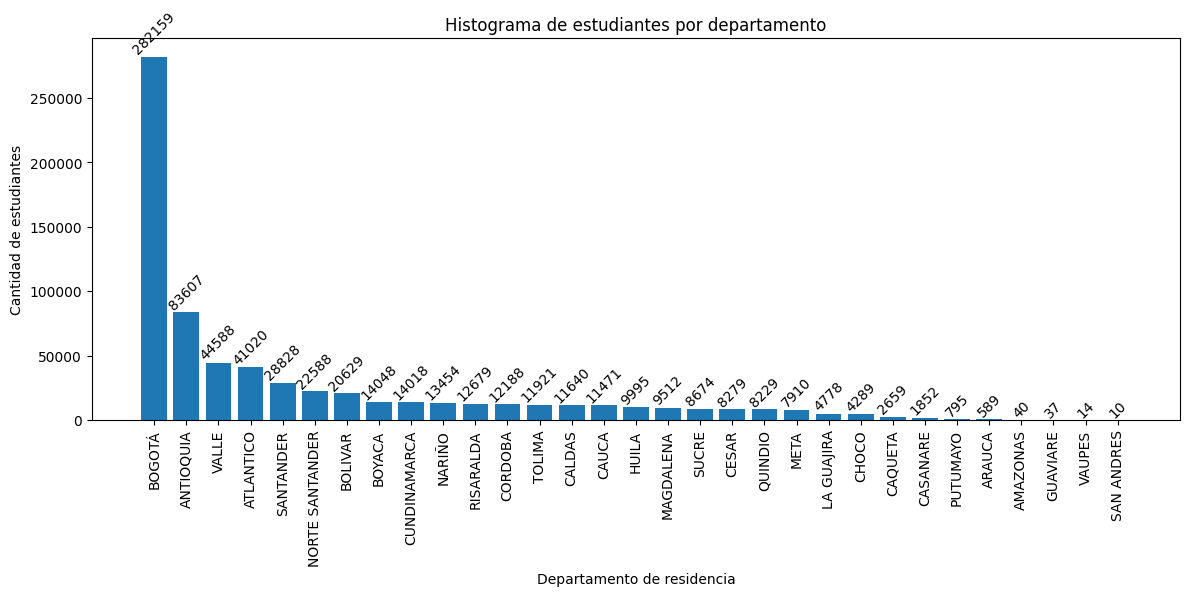

In [97]:
# Histogram of students in each department
plt.figure(figsize=(12, 6))
department_counts = dataset['ESTU_PRGM_DEPARTAMENTO'].value_counts()
bars = plt.bar(department_counts.index, department_counts.values)
plt.xlabel("Departamento de residencia")
plt.ylabel("Cantidad de estudiantes")
plt.title("Histograma de estudiantes por departamento")
plt.xticks(rotation=90)
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', rotation = 45)

plt.show()

department_counts = dataset['ESTU_PRGM_DEPARTAMENTO'].value_counts()



# Histogram of student tuition fees

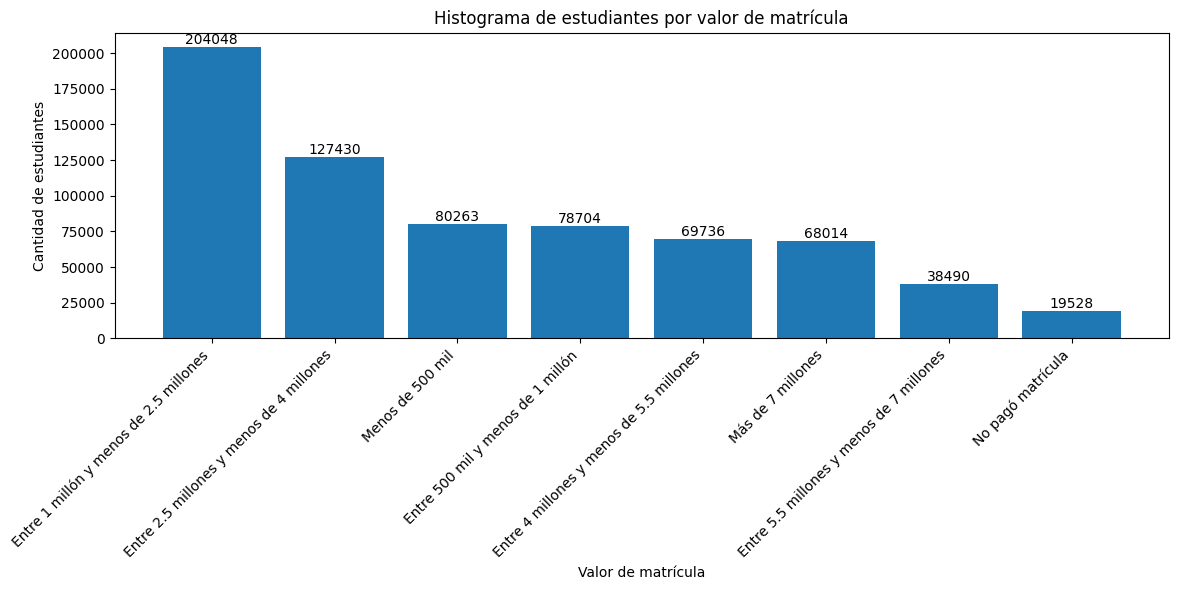

In [ ]:
# Histogram of student tuition fees
plt.figure(figsize=(12, 6))
tuition_fees = dataset['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()
bars = plt.bar(tuition_fees.index, tuition_fees.values)
plt.xlabel("Valor de matrícula")
plt.ylabel("Cantidad de estudiantes")
plt.title("Histograma de estudiantes por valor de matrícula")
plt.xticks(rotation=45, ha='right')

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()
